In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os, sys
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
path_parent = os.path.dirname(os.getcwd())
sys.path.insert(0, path_parent+'/Telecom-Data-Analysis/scripts')

In [3]:
from EDA import *
from data_clean import *

In [162]:
# df_iterative = pd.read_pickle('data/scaled_df_iterative.pkl')
df = pd.read_pickle('data/data_in_Dataframe.pkl') 
df_median = pd.read_pickle('data/df_median.pkl') 
df_knn = pd.read_pickle('data/df_knn.pkl') 
df_iterative = pd.read_pickle('data/scaled_df_iterative.pkl') 


In [5]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [163]:
df_customer_id = df['Bearer Id'].unique()
df_customer = pd.DataFrame(data = df_customer_id,columns=['ID'])

In [164]:
xDR_sessions = df_knn.groupby('Bearer Id')['Bearer Id'].count()
df_customer.insert(1, 'total_session',list(xDR_sessions) )


In [165]:
def aggregate_cols(dfa,dfb,cols,names):
    i = 0
    for col in cols:
        col_val = dfa.groupby('Bearer Id')[col].sum()
        dfb.insert(dfb.shape[1], names[i],list(col_val) )
        i+=1
    return dfb
        
        

In [166]:
columns = ['Dur. (ms)','Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)','Total DL (Bytes)','Total UL (Bytes)']
names = ['session_duration','social_DL','social_UL','Google_DL','Google_UL','Email_DL','Email_UL','Youtube_DL','Youtube_UL','Netflix_DL','Netflix_UL','Gaming_DL','Gaming_UL','Other_DL','Other_UL','Total_UL','Total_DL']
df_customer = aggregate_cols(dfa = df_knn,dfb=df_customer,cols=columns,names=names)

In [167]:
# Decile Classification
df_customer['Decile_rank'] = pd.qcut(df_customer['session_duration'], 10,
                            labels = False)

In [168]:
df_customer.Decile_rank.value_counts()

3    23299
0    13472
6    13472
9    13471
1    13471
8    13471
2    13470
7    13470
5    12475
4     4638
Name: Decile_rank, dtype: int64

In [169]:
df_customer.dtypes

ID                  float64
total_session         int64
session_duration    float64
social_DL           float64
social_UL           float64
Google_DL           float64
Google_UL           float64
Email_DL            float64
Email_UL            float64
Youtube_DL          float64
Youtube_UL          float64
Netflix_DL          float64
Netflix_UL          float64
Gaming_DL           float64
Gaming_UL           float64
Other_DL            float64
Other_UL            float64
Total_UL            float64
Total_DL            float64
Decile_rank           int64
dtype: object

# Univariate Analysis

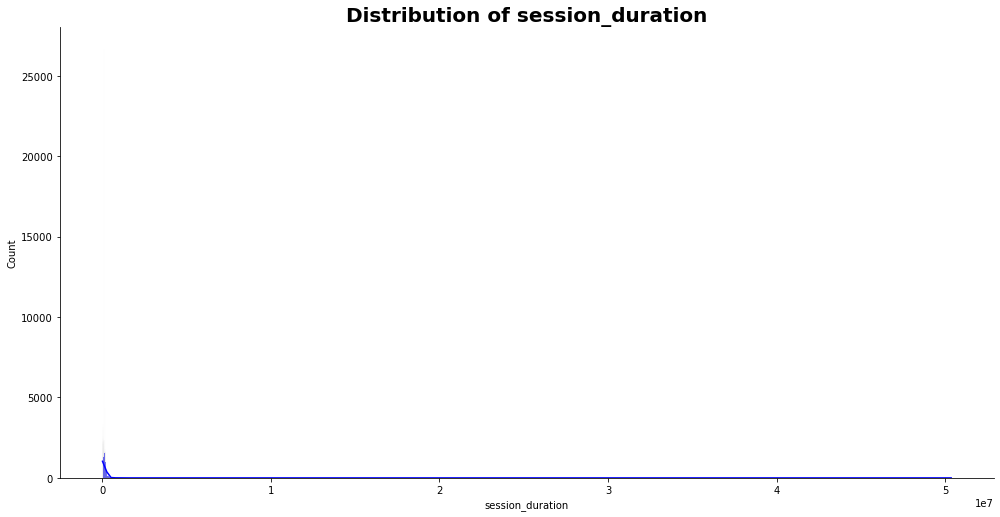

In [170]:
plot_hist(df_customer, "session_duration", "blue")


In [171]:
df_customer.describe()

,ID,total_session,session_duration,social_DL,social_UL,Google_DL,Google_UL,Email_DL,Email_UL,Youtube_DL,Youtube_UL,Netflix_DL,Netflix_UL,Gaming_DL,Gaming_UL,Other_DL,Other_UL,Total_UL,Total_DL,Decile_rank
count,"134,708.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00"
mean,"9,914,374,595,366,262,784.00",1.11,"116,483.46","1,999,124.49","36,666.43","6,403,570.98","2,289,998.04","1,995,123.73","520,429.10","12,954,758.11","12,259,184.83","12,946,717.63","12,250,660.50","469,954,698.16","9,229,286.87","468,903,360.06","9,203,009.29","506,254,001.98","45,789,235.22",4.42
std,"2,881,902,359,646,800,384.00",2.72,"169,424.22","5,053,080.61","92,912.48","15,773,676.22","5,743,075.04","5,043,154.83","1,286,757.66","32,905,097.95","30,612,276.58","32,807,848.01","30,335,087.70","1,159,559,448.11","22,519,203.01","1,158,922,013.91","23,722,717.11","1,246,965,178.32","112,179,475.50",2.90
min,"6,917,537,518,543,529,984.00",1.00,"7,142.00",12.00,0.00,207.00,3.00,14.00,2.00,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",156.00,"8,827,082.00","2,866,892.00",0.00
25%,"7,277,825,670,043,977,728.00",1.00,"60,081.00","974,477.00","17,802.00","3,121,057.00","1,112,497.00","966,526.00","253,367.00","6,323,302.00","5,977,507.00","6,278,324.00","5,947,372.00","228,014,891.00","4,486,353.00","228,202,394.00","4,495,066.00","261,476,184.00","34,073,743.00",2.00
50%,"7,349,883,261,405,995,008.00",1.00,"86,400.00","1,926,083.00","35,366.00","6,173,424.00","2,205,388.00","1,922,540.00","499,848.00","12,459,788.00","11,813,012.00","12,450,873.00","11,810,975.00","453,839,253.00","8,888,767.00","451,527,057.00","8,847,663.00","487,718,579.00","42,527,304.00",4.00
75%,"13,042,425,978,673,823,744.00",1.00,"153,089.00","2,857,818.00","52,342.00","9,136,285.00","3,277,679.00","2,853,201.00","743,054.00","18,512,403.00","17,494,518.00","18,510,529.00","17,500,965.00","672,196,362.00","13,168,214.00","670,530,653.00","13,133,655.00","706,462,834.00","51,770,215.00",7.00
max,"13,186,541,167,134,199,808.00",991.00,"50,358,583.00","1,795,125,247.77","33,013,296.43","5,593,584,764.62","2,038,858,294.93","1,791,489,371.87","456,315,686.44","11,693,940,877.50","10,865,823,936.13","11,657,754,823.72","10,759,539,557.82","411,223,633,404.60","7,981,325,443.11","411,054,510,337.19","8,438,099,764.42","443,756,726,137.50","40,572,998,085.00",9.00


In [172]:
df_customer.total_session.nunique()

12

In [173]:
df_customer.total_session.value_counts()

1      122960
2        9824
3        1506
4         299
5          72
6          25
7          12
8           4
9           4
991         1
10          1
16          1
Name: total_session, dtype: int64

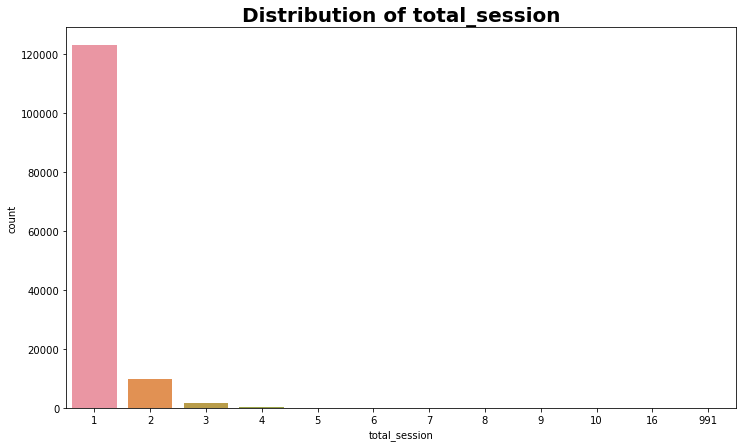

In [174]:
plot_count(df_customer, 'total_session')


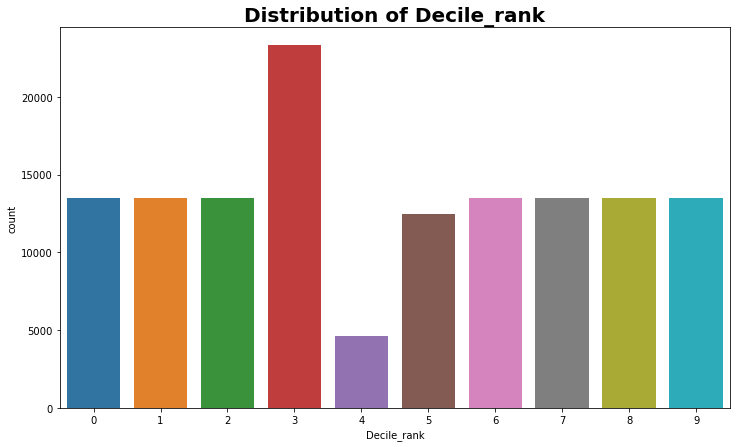

In [175]:
plot_count(df_customer, 'Decile_rank')


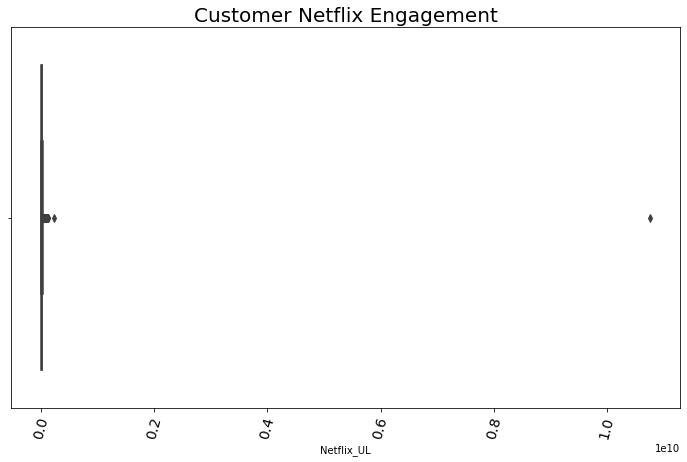

In [176]:
plot_box(df_customer,'Netflix_UL','Customer Netflix Engagement')

In [177]:
df_customer['Netflix_UL'] = fix_outlier(df=df_customer,column='Netflix_UL')

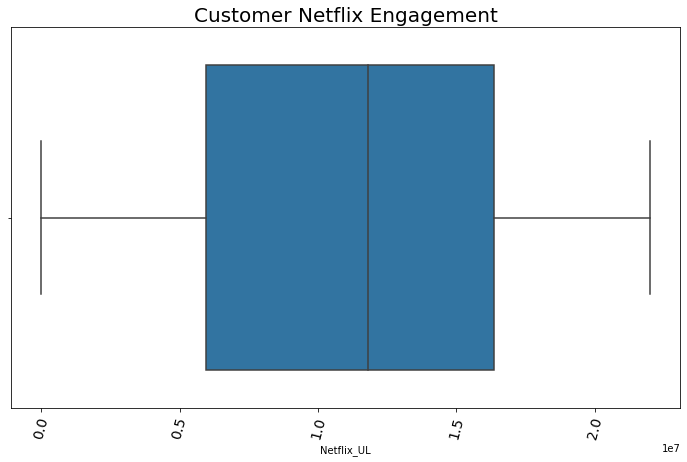

In [178]:
plot_box(df_customer,'Netflix_UL','Customer Netflix Engagement')

In [179]:
cols = df_customer.columns[2:]
for col in cols:
    df_customer[col] = fix_outlier(df=df_customer,column=col)

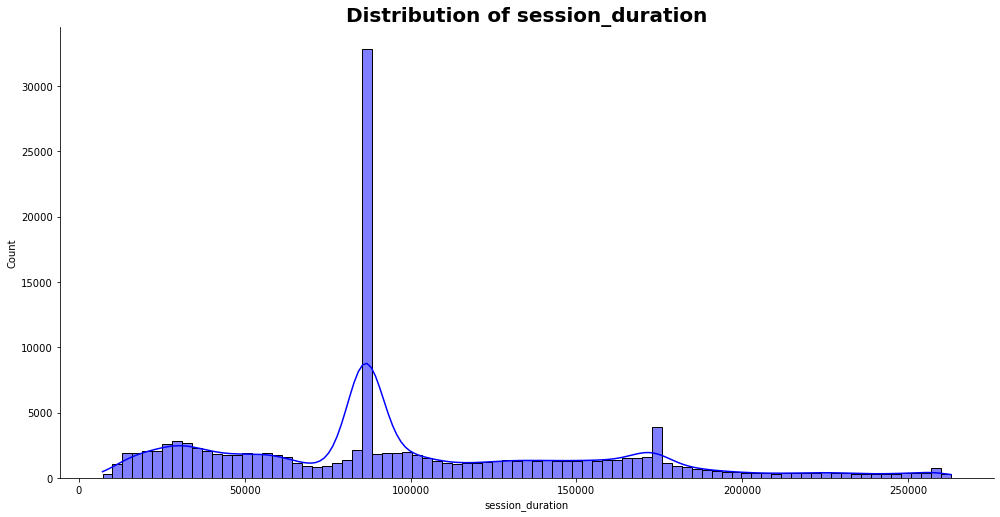

In [180]:
plot_hist(df=df_customer,column='session_duration',color='blue')

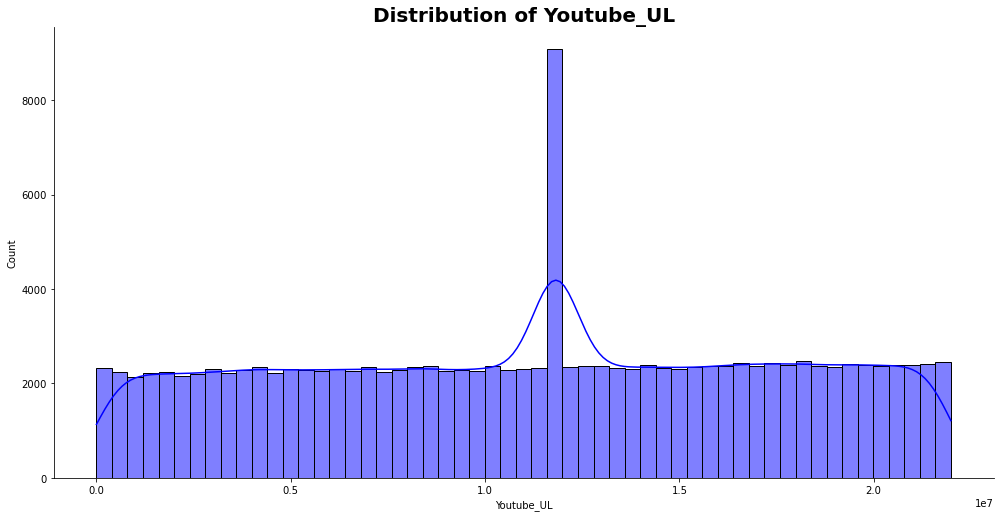

In [181]:
plot_hist(df=df_customer,column='Youtube_UL',color='blue')

# Multivariate Analysis

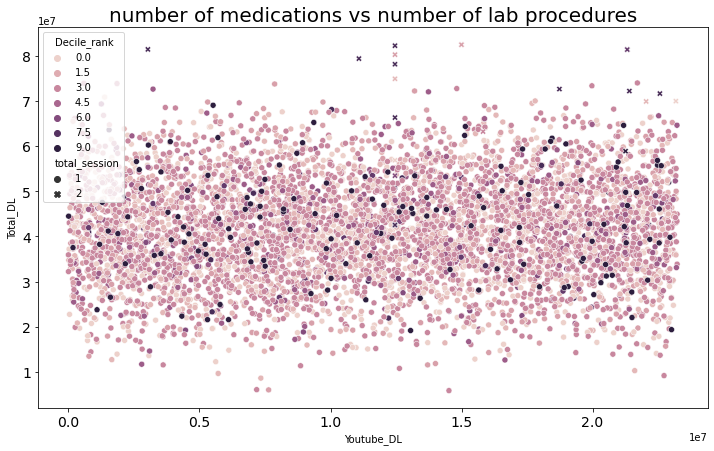

In [182]:
plot_scatter(df_customer.head(6000), x_col="Youtube_DL", y_col="Total_DL", hue="Decile_rank",
             style="total_session", title="number of medications vs number of lab procedures")

<AxesSubplot:>

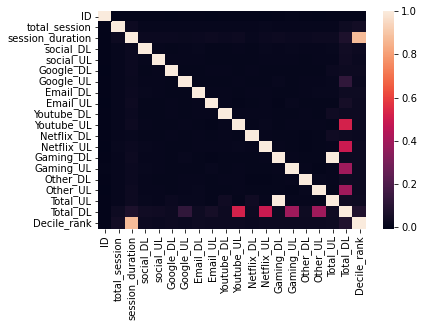

In [183]:
corr_mat = df_customer.corr()
sns.heatmap(corr_mat)

In [184]:
df_customer.describe()

,ID,total_session,session_duration,social_DL,social_UL,Google_DL,Google_UL,Email_DL,Email_UL,Youtube_DL,Youtube_UL,Netflix_DL,Netflix_UL,Gaming_DL,Gaming_UL,Other_DL,Other_UL,Total_UL,Total_DL,Decile_rank
count,"134,708.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00","134,709.00"
mean,"9,914,374,595,366,262,784.00",1.11,"100,430.20","1,823,440.14","33,437.51","5,838,743.91","2,089,170.39","1,819,746.12","474,609.13","11,815,217.59","11,181,963.04","11,805,096.11","10,692,179.24","428,689,361.30","8,419,497.92","427,816,011.88","8,388,400.38","462,624,810.19","42,259,988.07",4.42
std,"2,881,902,359,646,800,384.00",2.72,"56,429.88","1,008,328.34","18,520.73","3,223,423.13","1,158,873.01","1,009,297.81","262,864.70","6,531,736.87","6,182,358.24","6,542,689.14","5,733,935.98","237,799,547.04","4,653,242.51","236,728,619.20","4,641,541.74","238,798,153.46","12,221,293.75",2.90
min,"6,917,537,518,543,529,984.00",1.00,"7,142.00",12.00,0.00,207.00,3.00,14.00,2.00,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",156.00,"8,827,082.00","2,866,892.00",0.00
25%,"7,277,825,670,043,977,728.00",1.00,"60,081.00","974,477.00","17,802.00","3,121,057.00","1,112,497.00","966,526.00","253,367.00","6,323,302.00","5,977,507.00","6,278,324.00","5,947,372.00","228,014,891.00","4,486,353.00","228,202,394.00","4,495,066.00","261,476,184.00","34,073,743.00",2.00
50%,"7,349,883,261,405,995,008.00",1.00,"86,400.00","1,926,083.00","35,366.00","6,173,424.00","2,205,388.00","1,922,540.00","499,848.00","12,459,788.00","11,813,012.00","12,450,873.00","11,810,975.00","453,839,253.00","8,888,767.00","451,527,057.00","8,847,663.00","487,718,579.00","42,527,304.00",4.00
75%,"13,042,425,978,673,823,744.00",1.00,"137,756.00","2,673,048.00","48,961.00","8,554,297.00","3,063,454.00","2,669,784.00","695,409.00","17,313,824.00","16,388,769.00","17,314,234.00","15,250,128.00","628,602,297.00","12,322,940.00","626,910,587.00","12,271,149.00","662,789,173.00","49,606,191.00",7.00
max,"13,186,541,167,134,199,808.00",991.00,"262,981.00","3,581,392.00","65,801.00","11,453,766.00","4,113,965.00","3,582,156.00","934,610.00","23,233,447.00","21,985,940.00","23,240,859.00","20,878,576.00","842,646,225.00","16,542,878.00","842,227,342.00","16,538,950.00","902,507,968.00","82,576,971.00",9.00


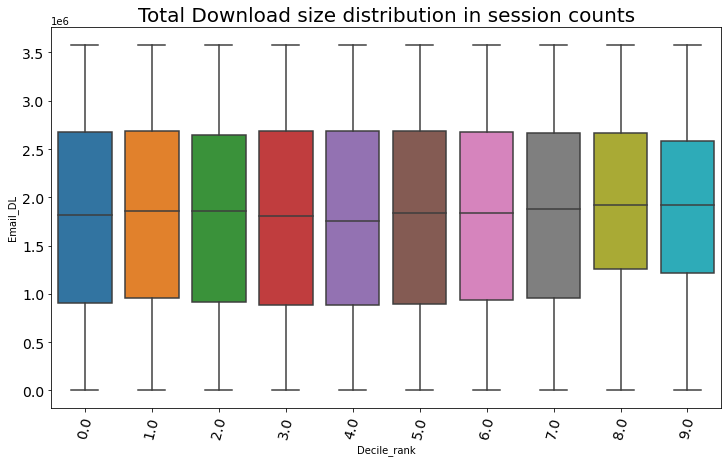

In [185]:
plot_box_multi(df_customer, x_col="Decile_rank", y_col="Email_DL", title="Total Download size distribution in session counts")

In [186]:
dfPair = df_customer[['total_session','Youtube_DL','Email_DL','Google_DL','Total_DL']].head(500)

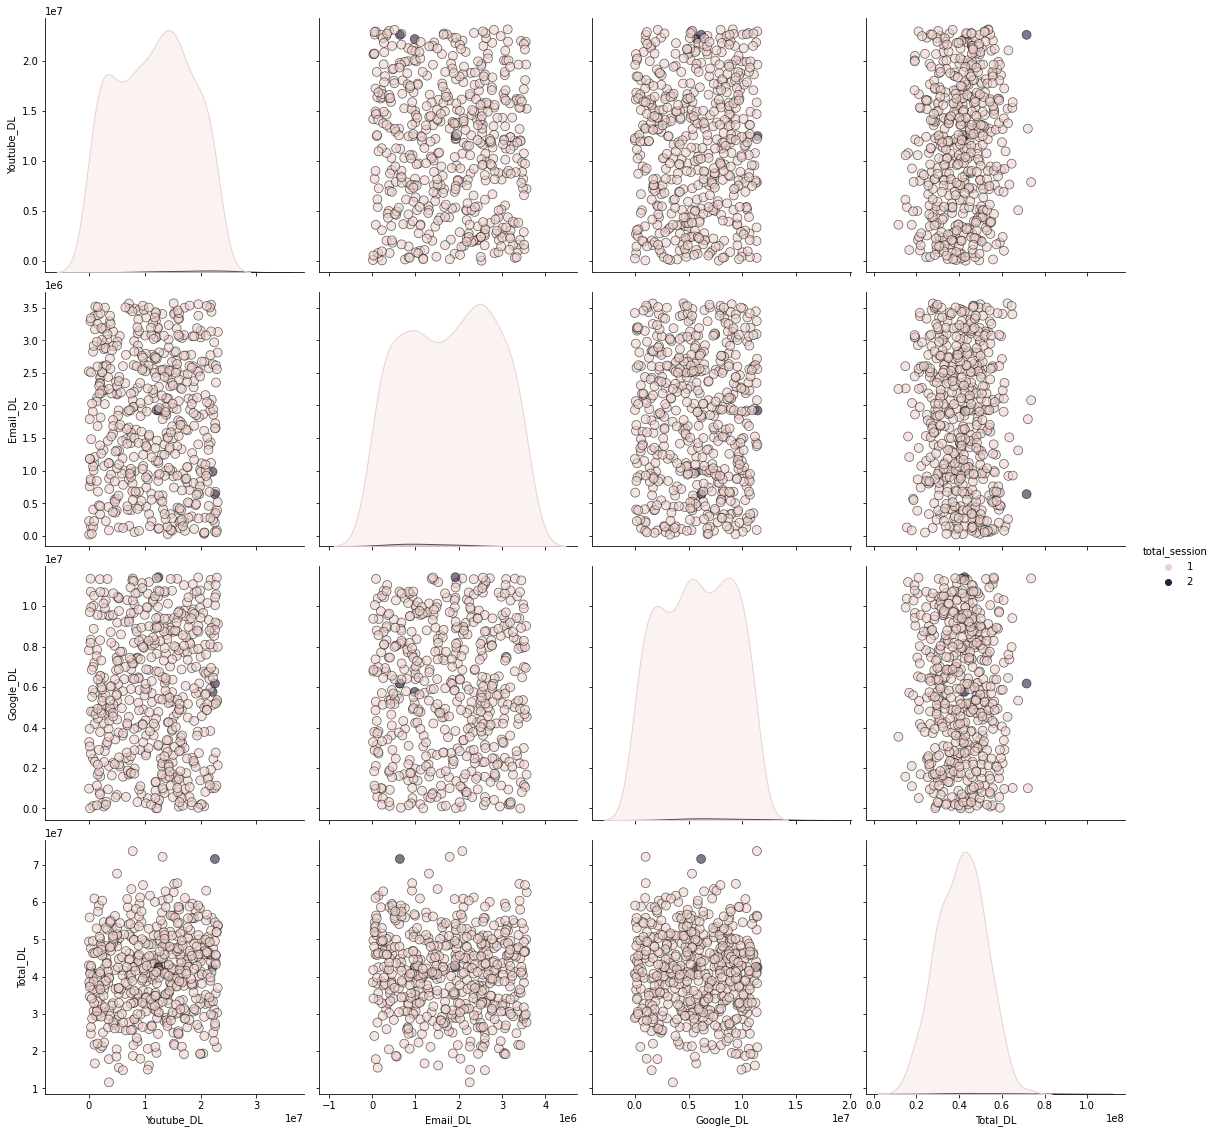

In [187]:
sns.pairplot(dfPair, hue = 'total_session', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)

0         0
1         0
2         0
3         0
4         0
         ..
134704    3
134705    7
134706    3
134707    3
134708    6
Name: Decile_rank, Length: 134709, dtype: int64